# HW 1 Type 1 Coherent Feed-Forward Loop

Created by: Lu Chao, Canal Li

Last updated by: Canal and Ethan on 2020-12-26

# Part 1 Written HW (50 points)

### <span style="color:red"> For this part, submit your response (neatly and clearly) to gradescope.

## Question1: Dynamics of Negative Autoregulation (15 points)

<p><strong>To understand why autoregulation is worth selecting for, we turn to the dynamics that arise from a system that uses it. Specifically, we will be looking at negative auto-regulation, by which a gene’s product represses its own transcription, as this is the type of auto-regulation displayed by more than 80% of the self-regulating genes.</strong>

Recall from last lecture that a gene’s transcription is governed by its production
rate $f(X)$ as well as its degradation rate $\alpha$
$$\frac{dX}{dt}=f(X)-\alpha X $$
However, the concentration of $X$ appears to increase linearly (for strong negative autoregulation) until it reaches the threshold, $K$.

1) Provide evidence of why autoregulation must have been selected for (rather than just having completely randomized nodes and edges?) <span style="color:green"> **2 points**

2) Why is there a linear increase in the concentration of $X$ before it reaches the threshold? (2 pts) And write the equations for the change in concentration of $X$ when it is both above and below this threshold and solve the differential equations.(5 pts) Also, draw a zoomed in version of the negative autoregulation plot that emphasizes what the concentration of $X$ looks like over time at steady state. (2 pts)<span style="color:green"> **9 points**

3) How can you differentiate between strong and weak autoregulation just by looking at the equation? (1 pts)  What would be a scenario in which strong negative autoregulation would be more beneficial than weak and why? (3 pts) <span style="color:green"> **4 points**

## Question 2: FFL part 1, with part 2 in next homework (35 points) 

<strong>Next, we will turn to coherent feed-forward loops (C-FFLs). These loops consist of two transcription factors, $X$ and $Y$, which regulate the transcription of a gene, $Z$. There are both coherent and incoherent feed-forward loops, depending on the transcription factors' effects on $Z$.</strong>

1)Draw the node subgraph that is most commonly used in biological systems for C1-FFLs. Be sure to label which nodes represent transcription factors $X$ and $Y$ and gene $Z$. <span style="color:green"> **4 points**

2)What differentiates a coherent from an incoherent network? be sure to address more than one difference.<span style="color:green"> **5 points**

3)Imagine a cell is in an environment that has many different unnecessary signals always being produced. It is difficult for the cell to determine which are important and which are steady vs. transient (i.e. should the cell immediately respond to the addition or removal of $S_X$, or should there be a delay before the reaction?). Which type of C1-FFL would be more useful for the cell to utilize in this type of environment (and why?), and what is this phenomenon called? (5 pts) What type of environment would the cell more likely use the other type of C1-FFL and why? (5 pts) <span style="color:green"> **10 points**

4)Now, we will focus a bit on the incoherent FFL. What is the node subgraph most commonly used in biological systems for I1-FFLs. Again, be sure to label which nodes represent transcription factors $X$ and $Y$ and gene $Z$.<span style="color:green"> **6 points**

5)Label what form of regulation each line in the image below represents.(3 pts) What is unique about the I1-FFL line and why does this occur? (3 pts) What are some pros and cons of this unique feature? (4 pts)<span style="color:green"> **10 points**
<center>
    <img src="comparison.png" width="400px" />
<center>

# Part 2 Coding HW (50 points)

## Import packages

In [177]:
# Use ctrl+enter to execute this cell
import matplotlib.pyplot as plt
import numpy as np

## Section 1 AND-gated C1-FFL, exact solution (10 pts)

Here, you are asked to reuse some of the codes from the AND-gated C1-FFL, to create the plot for the <span style="color:red">AND-gated C1-FFL</span>. Recall from lecture that AND-gated C1-FFL is defined as:
$$\frac{dX}{dt} = \beta \theta ( S_{x} \text{ is present)} -\alpha X$$
$$\frac{dY}{dt} = \beta \theta ( X>K_{XY}) -\alpha Y$$
$$\frac{dZ}{dt} = \beta \theta (X>K_{XZ} \text{ AND } Y>K_{YZ}) -\alpha Z$$
</p>

In [178]:
def AND_gate_C1(tOFF=25, beta=0.5, alpha=0.25, kxy=1.0, kxz=0.5, kyz=0.75):
    """
    Here we use the exact solution (solving for X(t), Y(t), Z(t)) solved in lecture.
    As a quick reminder, we have given the solutions of these in the markdown cell above.
    Note that here we use same alpha and beta values for all X,Y,Z to simplify coding.
    INPUT:
        beta,alpha,kxy,kxz,kyz - parameters of the AND-gated C1-FFL
    OUPUT:
        sx,x,y,z - the exact values of these concentrations that varies with time t
    """
    #Dont change these
    # t is an array of time steps, with dt=t[i+1]-t[i] 
    # representing a (very small) discrete interval that allows us to plot X,Y,Z
    # here -5 means the plot starts at t=-5 (to visualize the presence of Sx at t=0)
    # 50 means the plot ends at t=45, and 1000 means there are 1000 time steps
    # so one time step, dt = (45-(-5))/1000 = 0.05
    t = np.linspace(-5, 45, 1000)
    # sx,x,y,z are the concentrations of Sx,X,Y,Z that vary with time t
    # they are all initialized to zero and 
    # you will fill their values at time t[i] for all t[i]
    # len(t) = 1000 as there are 1000 time steps
    sx,x,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))

    # Sx
    # Sx is turned ON at t=0, and turned OFF at tOFF, default t=25
    for i in range(len(t)):
        if t[i] > 0 and t[i] <= tOFF:
            sx[i] = 1

    # X
    for i in range(len(t)):
        # X begin to change after t=0
        if (t[i] > 0) :
            if sx[i] == 1:
                x[i] = beta/alpha * (1-np.exp(-alpha*t[i]))
            else:
                x[i] = beta/alpha * np.exp(-alpha * (t[i]-tOFF)) #Sx is OFF after t=tOFF
        
    # Since the exact solution requires us to record the time 
    # when x just reach above kxy or kxz, and when x just drop below kxy or kxz
    # this switches ON or OFF Y and Z
    x_below_kxy = True # x is below kxy and kxz at the start
    x_below_kxz = True
    for i in range(len(t)):
        if x_below_kxy and x[i] >= kxy:
            x_below_kxy = False
            x_reach_kxy = t[i]
        elif not x_below_kxy and x[i] < kxy:
            x_below_kxy = True
            x_drop_kxy = t[i]
        if x_below_kxz and x[i] >= kxz:
            x_below_kxz = False
            x_reach_kxz = t[i]
        elif not x_below_kxz and x[i] < kxz:
            x_below_kxz = True
            x_drop_kxz = t[i]
    print("x reaches kxz at time t=%.4f" % x_reach_kxz)
    print("x reaches kxy at time t=%.4f" % x_reach_kxy)
    
    
    # Y
    for i in range(len(t)):
        if x[i] > kxy:
            # the exact solution of growth is shifted 
            # by a t=x_reach_kxy
            y[i] = beta/alpha * (1-np.exp(-alpha*(t[i]-x_reach_kxy)))
        elif x[i] < kxy and t[i] >= x_drop_kxy:
            # the exact solution of decay is shifted 
            # by a t=x_drop_kxy
            y[i] = beta/alpha * np.exp(-alpha*(t[i]-x_drop_kxy))

    # Y threshold
    y_below_kyz = True
    for i in range(len(t)):
        if y_below_kyz and y[i] >= kyz:
            y_below_kyz = False
            y_reach_kyz = t[i]
        elif not y_below_kyz and y[i] < kyz:
            y_below_kyz = True
            y_drop_kyz = t[i]
    print("y reaches kyz at time t=%.4f" % y_reach_kyz)


    # Z
    # students should be able to fill this out
    #############################<GRADED>###########################################
    
    ##Fill in your solution
    for i in range(len(t)):
        if y[i]>=kyz and x[i]>=kxz:
            if t[i]>=y_reach_kyz and t[i]>=x_reach_kxz:
                # expression when both thresholds are reached
                if x_reach_kxz < y_reach_kyz:
                    larger_of_two = y_reach_kyz
                elif x_reach_kxz >= y_reach_kyz:
                    larger_of_two = x_reach_kxz
                z[i] = beta/alpha*(1-np.exp(-alpha*(t[i]-larger_of_two)))
     
            
    # decay begins when either X or Y is gone, Any OFF signal would turn Z OFF
        elif y[i] < kyz or x[i] < kxz :
            if t[i]>=y_drop_kyz or t[i]>=x_drop_kxz:
                # Z decays immediately after reaching smaller drop
                if y_drop_kyz >= x_drop_kxz:
                    smaller_of_two = x_drop_kxz
                elif y_drop_kyz < x_drop_kxz:
                    smaller_of_two = y_drop_kyz
                z[i] = beta/alpha * np.exp(-alpha*(t[i]-smaller_of_two))
                
    
    
    #############################<GRADED>###########################################

    return sx,x,y,z

Now, you can use the fuction AND_gate_C1() to print out the time that x and y reach their thresholds.<p> You can also change the parameters to learn how the parameters change the sensitivity.

In [179]:
# run this
print("This is the default parameters:")
sx,x,y,z = AND_gate_C1()
print("\nThis is the changed parameters:")
sx,x,y,z = AND_gate_C1(tOFF=15, beta=0.9, alpha=0.5, kxy=1.0, kxz=0.75, kyz=0.25)
print("\nAnd you can tweak around the parameters to see the change")
# in order for the system to make biological sense, beta must be greater than alpha
# and avoid very small beta and alpha values (otherwise never reach kxy, kxz, kyz)
sx,x,y,z = AND_gate_C1(beta=0.2, alpha=0.15, kxy=1.0, kxz=0.75, kyz=0.25)


This is the default parameters:
x reaches kxz at time t=1.1562
x reaches kxy at time t=2.8078
y reaches kyz at time t=4.7097

This is the changed parameters:
x reaches kxz at time t=1.1061
x reaches kxy at time t=1.6567
y reaches kyz at time t=1.9570

And you can tweak around the parameters to see the change
x reaches kxz at time t=5.5606
x reaches kxy at time t=9.2643
y reaches kyz at time t=10.6657


In [180]:
# The fuction for plotting the C1-FFL with Sx, X, Y and Z
# You will also use this for the OR-gated C1-FFL
def plot_C1_FFL(sx, x, y, z, title, kxy = 1.0, kxz = 0.5, kyz = 0.75):
    t = np.linspace(-5, 45, 1000)
    kxys = np.full(len(t), kxy)
    kxzs = np.full(len(t), kxz)
    kyzs = np.full(len(t), kyz)
    plt.figure()
    plt.subplot(411, xticks=[], yticks=[])
    plt.plot(t, sx)
    plt.ylabel("S_x")
    plt.title(title)
    
    plt.subplot(412, xticks=[], yticks=[])
    plt.plot(t, x, label="X")
    plt.plot(t, kxys, 'r--', label="Kxy")
    plt.plot(t, kxzs, 'm--', label="Kxz")
    plt.ylabel("X")
    plt.legend(loc="best")
    
    plt.subplot(413, xticks=[], yticks=[])
    plt.plot(t, y, label="Y")
    plt.plot(t, kyzs, 'g--', label="Kyz")
    plt.ylabel("Y")
    plt.legend(loc="best")
    
    plt.subplot(414, xticks=[], yticks=[])
    plt.plot(t, z, label="Z")
    plt.xlabel("t")
    plt.ylabel("Z")
    plt.legend(loc="best")
    
    plt.show()

Now, you can plot the figure and see for yourself!</p> If your answer is correct, you should get the same figure as this one with default parameters.
<center>
    <img src="ANDC1FFL.png" width="400px" />
<center>

And you need to also be correct for the changed parameters.
<center>
    <img src="ANDC1FFL2.png" width="400px" />
<center>
    
<span style="color:blue">THIS IS YOUR TEST CASE</span>

x reaches kxz at time t=1.1562
x reaches kxy at time t=2.8078
y reaches kyz at time t=4.7097


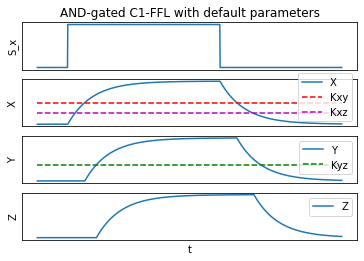

x reaches kxz at time t=2.4074
x reaches kxy at time t=1.4565
y reaches kyz at time t=3.3584


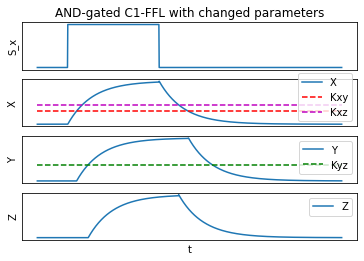

In [181]:
# run this and compare results. 
# DO NOT CHANGE ANY PARAMETERS
sx,x,y,z = AND_gate_C1()
plot_C1_FFL(sx,x,y,z,"AND-gated C1-FFL with default parameters",kxy=1.0,kxz=0.5,kyz=0.75)
sx,x,y,z = AND_gate_C1(tOFF=15, beta=0.5, alpha=0.25, kxy=0.6, kxz=0.9, kyz=0.75)
plot_C1_FFL(sx,x,y,z,"AND-gated C1-FFL with changed parameters",kxy=0.6,kxz=0.9,kyz=0.75)

## Section 2 OR-gated C1-FFL, exact solution (20 pts)

Here, you are asked to reuse some of the codes from the AND-gated C1-FFL, to create the plot for the <span style="color:red">OR-gated C1-FFL</span>. Remember from lecture that OR-gated C1-FFL is defined as:
$$\frac{dX}{dt} = \beta \theta ( S_{x} \text{ is present)} -\alpha X$$
$$\frac{dY}{dt} = \beta \theta ( X>K_{XY}) -\alpha Y$$
$$\frac{dZ}{dt} = \beta \theta (X>K_{XZ} \text{ OR } Y>K_{YZ}) -\alpha Z$$


In [182]:
def OR_gate_C1(tOFF=25, beta=0.5, alpha=0.25, kxy=1.0, kxz=0.5, kyz=0.75):
    """
    Write the fuction for getting X(t), Y(t), Z(t) in the OR-gated C1-FFL
    INPUT:
        beta,alpha,kxy,kxz,kyz - parameters of the OR-gated C1-FFL
    OUPUT:
        sx,x,y,z - the exact values of these concentrations that varies with time t
    """
    #Dont change these
    t = np.linspace(-5, 45, 1000)
    sx,x,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))
    #############################<GRADED>###########################################
    
    ##Fill in your solution
    # Sx
    # Sx is turned ON at t=0, and turned OFF at tOFF, default t=25
    for i in range(len(t)):
        if t[i] > 0 and t[i] <= tOFF:
            sx[i] = 1

    # X
    for i in range(len(t)):
        # X begin to change after t=0
        if (t[i] > 0) :
            if sx[i] == 1:
                x[i] = beta/alpha * (1-np.exp(-alpha*t[i]))
            else:
                x[i] = beta/alpha * np.exp(-alpha * (t[i]-tOFF)) #Sx is OFF after t=tOFF
        
    # Since the exact solution requires us to record the time 
    # when x just reach above kxy or kxz, and when x just drop below kxy or kxz
    # this switches ON or OFF Y and Z
    x_below_kxy = True # x is below kxy and kxz at the start
    x_below_kxz = True
    for i in range(len(t)):
        if x_below_kxy and x[i] >= kxy:
            x_below_kxy = False
            x_reach_kxy = t[i]
        elif not x_below_kxy and x[i] < kxy:
            x_below_kxy = True
            x_drop_kxy = t[i]
        if x_below_kxz and x[i] >= kxz:
            x_below_kxz = False
            x_reach_kxz = t[i]
        elif not x_below_kxz and x[i] < kxz:
            x_below_kxz = True
            x_drop_kxz = t[i]
    print("x reaches kxz at time t=%.4f" % x_reach_kxz)
    print("x reaches kxy at time t=%.4f" % x_reach_kxy)
    
    
    # Y
    for i in range(len(t)):
        if x[i] > kxy:
            # the exact solution of growth is shifted 
            # by a t=x_reach_kxy
            y[i] = beta/alpha * (1-np.exp(-alpha*(t[i]-x_reach_kxy)))
        elif x[i] < kxy and t[i] >= x_drop_kxy:
            # the exact solution of decay is shifted 
            # by a t=x_drop_kxy
            y[i] = beta/alpha * np.exp(-alpha*(t[i]-x_drop_kxy))

    # Y threshold
    y_below_kyz = True
    for i in range(len(t)):
        if y_below_kyz and y[i] >= kyz:
            y_below_kyz = False
            y_reach_kyz = t[i]
        elif not y_below_kyz and y[i] < kyz:
            y_below_kyz = True
            y_drop_kyz = t[i]
    print("y reaches kyz at time t=%.4f" % y_reach_kyz)


    # Z
    for i in range(len(t)):
        if y[i]>=kyz or x[i]>=kxz:
            if t[i]>=y_reach_kyz or t[i]>=x_reach_kxz:
                # expression when both thresholds are reached
                if x_reach_kxz >= y_reach_kyz:
                    smaller_of_two = y_reach_kyz
                elif x_reach_kxz < y_reach_kyz:
                    smaller_of_two = x_reach_kxz
                z[i] = beta/alpha*(1-np.exp(-alpha*(t[i]-smaller_of_two)))
     
            
    # decay begins when either X or Y is gone, Any OFF signal would turn Z OFF
        elif y[i] < kyz or x[i] < kxz :
            if t[i]>=y_drop_kyz or t[i]>=x_drop_kxz :
                # Z decays immediately after reaching smaller drop
                if y_drop_kyz < x_drop_kxz:
                    larger_of_two = x_drop_kxz
                elif y_drop_kyz >= x_drop_kxz:
                    larger_of_two = y_drop_kyz
                z[i] = beta/alpha * np.exp(-alpha*(t[i]-larger_of_two))
                
    
    
    #############################<GRADED>###########################################
    return sx,x,y,z

Now, you can plot the figure and see for yourself! If your answer is correct, you should get the same figures, as in the case of AND-gated C1-FFL
<center>
    <img src="ORC1FFL.png" width="300px" />
<center>
    
<span style="color:blue">THIS IS YOUR TEST CASE</span>

x reaches kxz at time t=1.1562
x reaches kxy at time t=2.8078
y reaches kyz at time t=4.7097


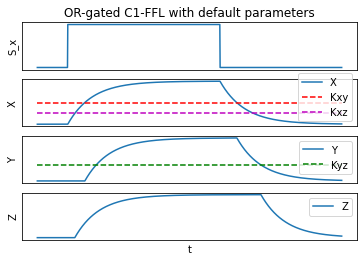

x reaches kxz at time t=2.0571
x reaches kxy at time t=1.4565
y reaches kyz at time t=3.3584


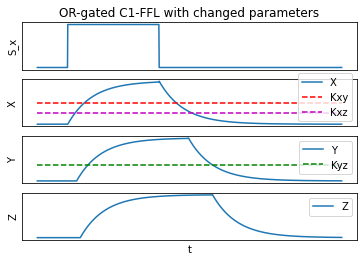

In [183]:
## your test case
## RUN BUT DONT CHANGE ANYTHING
sx,x,y,z = OR_gate_C1()
plot_C1_FFL(sx,x,y,z,"OR-gated C1-FFL with default parameters")
sx,x,y,z = OR_gate_C1(tOFF=15, beta=0.5, alpha=0.25, kxy=0.6, kxz=0.8, kyz=0.75)
plot_C1_FFL(sx,x,y,z,"OR-gated C1-FFL with changed parameters")

## Numerical approximations: Euler's Methd (20)

Now let us try the numerical solution. We are using the numerical method taught in MATH 2930. If you want a more in-depth review, take a look at section 2.7 of the 'Elementary Differential Equations and Boundary Value Problems 11th'. But in summary, let a differential equation $\partial y/\partial x$ be :
$$\partial y/\partial x = f(t,y),\ y(t_0)=y_0$$
We know that the solution passes through the initial point $(t_0, y_0)$, and from the differential equation, we also know that its slope at this point is $f(t_0, y_0)$. Since $f(t,y) = \frac{\partial y}{\partial t} \approx \frac{\Delta y}{\Delta t}$, we can think of $f(t,y)$ as a small change in $y$ caused by a small change in $t$. Therefore, to approxiate $y(t,y)$, we can use this equation:
$$y_{n}=y_{n-1}+(y_{n}-y_{n-1})=y_{n-1}+ \frac{\Delta y}{\Delta t}\times \Delta t \approx   y_{n-1}+f(t_{n-1},y_{n-1})\Delta t \ \ \ \text{for $n=1,2,3...$}$$

Here, we use <span style="color:red">a persistance detection</span> to plot the graph for <span style="color:red">a persistance detection</span> (remember from lecture AND-gate C1-FFL can allow $Z$ to be expressed only if $S_x$ is present for an extended time). You will also get an chance to see how this compares with the function of exactly solution that you wrote for AND-gate. 

In [184]:
def persistance_detection_numerical(beta=0.5, alpha=0.25, kxy=1.0, kxz=0.5, kyz=0.75, on1=0, off1=2, on2=12, off2=30):
    """
    The exactly solution for persistance detection (just an AND-gated C1-FFL)
    INPUT:
        beta,alpha,kxy,kxz,kyz - parameters of the AND-gated C1-FFL
    OUPUT:
        sx,x,y,z - the exact values of these concentrations that varies with time t
    """
    t = np.linspace(-5, 45, 1000)
    sx,x,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))

    # Sx
    # Let Sx to be turned on at on1, turned off at off1
    # And then turned on at on2 again and turned off at off2 again
    for i in range(len(t)):
        if t[i] > on1 and t[i] <= off1:
            sx[i] = 1
        if t[i] > on2 and t[i] <= off2:
            sx[i] = 1
    
    ## calculate the time step Delta t (dt)
    ## Delta t = (start time -end time)/(no. of time segments)
    ## Get this information from t = np.linspace(-5, 45, 1000)
    #############################<GRADED>###########################################
    
    ##Fill in your solution
    
    dt = (45-(-5))/1000
    #############################<GRADED>###########################################
    
    
    # Righthand side of differential equation
    # f(X) = dX/dt = beta*theta(X>K)-alpha*X
    # Note that theta function is implicitly expressed as an if-else clause
    def f_x(x, i):
        if sx[i] == 1:
            return beta - alpha *x
        else:
            return - alpha *x
    
    # Integrate the differential equation using Euler’s method
    # Refer back to the notes above
    for i in range(len(t)):
        x[i] = x[i-1] + f_x(x[i-1], i-1)*dt
    
    
    ## Now use the hints from how X(t) is computed
    ## to calculate for Y and Z
    ## remember this is an AND-gate!!!!
    #############################<GRADED>###########################################
    #Y
    def f_y(y, i): 
        ##Fill in your solution
        if x[i] >= kxy :
            return beta-alpha*y
        else:
            return -alpha *y
           
    for i in range(len(t)):
        ##Fill in your solution
        y[i]= y[i-1] + f_y(y[i-1], i-1)*dt

        
    #Z
    def f_z(z, i):
        ##Fill in your solution
        if x[i] >=kxz and y[i]>=kyz :
            return beta - alpha *z
        else:
            return -alpha *z
        
    for i in range(len(t)):    
        ##Fill in your solution
        z[i] = z[i-1] + f_z(z[i-1], i-1)*dt
    #############################<GRADED>###########################################
    
    return sx,x,y,z

Below is the code for exact solution of persistance detection. Note that I only changed the way $S_x$ and $X$ is turned on and off. Remember to copy your solution from AND-gate C1-FFL to here! This will not be graded.

In [185]:
def persistance_detection_exact(beta=0.5, alpha=0.25, kxy=1.0, kxz=0.5, kyz=0.75, on1=0, off1=2, on2=12, off2=30):
    """
    The exactly solution for persistance detection (just an AND-gated C1-FFL)
    INPUT:
        beta,alpha,kxy,kxz,kyz - parameters of the AND-gated C1-FFL
    OUPUT:
        sx,x,y,z - the exact values of these concentrations that varies with time t
    """
    t = np.linspace(-5, 45, 1000)
    sx,x,y,z = np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t)), np.zeros(len(t))

    # Sx
    # Let Sx to be turned on at on1, turned off at off1
    # And then turned on at on2 again and turned off at off2 again
    for i in range(len(t)):
        if t[i] > on1 and t[i] <= off1:
            sx[i] = 1
        if t[i] > on2 and t[i] <= off2:
            sx[i] = 1

    # X
    for i in range(len(t)):
        if sx[i] == 1 and on1<t[i]<off1:
            x[i] = beta/alpha * (1-np.exp(-alpha*(t[i]-on1)))
        elif sx[i] == 0 and off1<t[i]<on2:
            x[i] = max(x) * np.exp(-alpha * (t[i]-off1))
        elif sx[i] == 1 and on2<t[i]<off2:
            x[i] = beta/alpha * (1-np.exp(-alpha*(t[i]-on2)))
        elif sx[i] == 0 and off2<t[i]:
            x[i] = max(x) * np.exp(-alpha * (t[i]-off2))

        
    # Since the exact solution requires us to record the time 
    # when x just reach above kxy or kxz, and when x just drop below kxy or kxz
    # this switches ON or OFF Y and Z
    x_below_kxy = True # x is below kxy and kxz at the start
    x_below_kxz = True
    for i in range(len(t)):
        if x_below_kxy and x[i] >= kxy:
            x_below_kxy = False
            x_reach_kxy = t[i]
        elif not x_below_kxy and x[i] < kxy:
            x_below_kxy = True
            x_drop_kxy = t[i]
        if x_below_kxz and x[i] >= kxz:
            x_below_kxz = False
            x_reach_kxz = t[i]
        elif not x_below_kxz and x[i] < kxz:
            x_below_kxz = True
            x_drop_kxz = t[i]

    # Y
    for i in range(len(t)):
        if x[i] > kxy:
            # the exact solution of growth is shifted 
            # by a t=x_reach_kxy
            y[i] = beta/alpha * (1-np.exp(-alpha*(t[i]-x_reach_kxy)))
        elif x[i] < kxy and t[i] >= x_drop_kxy:
            # the exact solution of decay is shifted 
            # by a t=x_drop_kxy
            y[i] = beta/alpha * np.exp(-alpha*(t[i]-x_drop_kxy))

    # Y threshold
    y_below_kyz = True
    for i in range(len(t)):
        if y_below_kyz and y[i] >= kyz:
            y_below_kyz = False
            y_reach_kyz = t[i]
        elif not y_below_kyz and y[i] < kyz:
            y_below_kyz = True
            y_drop_kyz = t[i]

    # Z
    # COPY your solution from AND_gate_C1 here!!!
    # This is not graded
    # If yours didn't work, we will test this base on sample solution
    #############################<Not GRADED>###########################################
     
    ##Fill in your solution from AND_gate_C1
    for i in range(len(t)):
        if y[i]>=kyz and x[i]>=kxz:
            if t[i]>=y_reach_kyz and t[i]>=x_reach_kxz:
                # expression when both thresholds are reached
                if x_reach_kxz < y_reach_kyz:
                    larger_of_two = y_reach_kyz
                elif x_reach_kxz >= y_reach_kyz:
                    larger_of_two = x_reach_kxz
                z[i] = beta/alpha*(1-np.exp(-alpha*(t[i]-larger_of_two)))
     
            
    # decay begins when either X or Y is gone, Any OFF signal would turn Z OFF
        elif y[i] < kyz or x[i] < kxz :
            if t[i]>=y_drop_kyz or t[i]>=x_drop_kxz:
                # Z decays immediately after reaching smaller drop
                if y_drop_kyz >= x_drop_kxz:
                    smaller_of_two = x_drop_kxz
                elif y_drop_kyz < x_drop_kxz:
                    smaller_of_two = y_drop_kyz
                z[i] = beta/alpha * np.exp(-alpha*(t[i]-smaller_of_two))
                
    #############################<Not GRADED>###########################################

    return sx,x,y,z

Now let us see how they compares with each other. If you implemented your code correctly, both should show as the figure below:
<center>
    <img src="persistence.png" width="400px" />
<center>
    
<span style="color:blue">THIS IS YOUR TEST CASE</span>

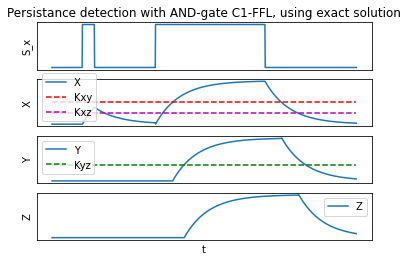

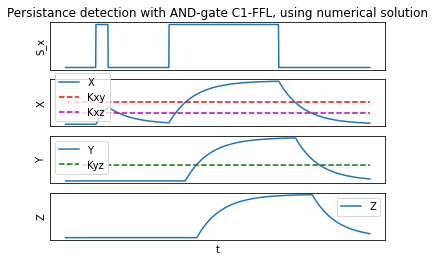

In [186]:
## run this to check your answer!
sx,x,y,z = persistance_detection_exact()
plot_C1_FFL(sx,x,y,z,"Persistance detection with AND-gate C1-FFL, using exact solution")
sx,x,y,z = persistance_detection_numerical()
plot_C1_FFL(sx,x,y,z,"Persistance detection with AND-gate C1-FFL, using numerical solution")